In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [9]:
def convolution2d(image, kernel):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
   

    padding_h = (kernel_h - 1) // 2
    padding_w = (kernel_w - 1) // 2

    padded_image = np.pad(image, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)
    output = np.zeros((image_h, image_w))

    print(output.size)
    
    for i in range(image_h):
        for j in range(image_w):
            new = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(new * kernel)
    return output

image = np.random.rand(8, 4)
print(image)
kernel = np.random.rand(3, 3)
kernel = np.flipud(np.fliplr(kernel))

convolution2d(image,kernel)


[[0.85087353 0.82024108 0.65028807 0.27359261]
 [0.36072073 0.91536741 0.92834989 0.01803279]
 [0.09080829 0.47029824 0.71484135 0.71619419]
 [0.15117866 0.67156487 0.95300943 0.26382563]
 [0.7016435  0.42106053 0.8957351  0.07484452]
 [0.90562908 0.49156405 0.06717174 0.48993424]
 [0.08020247 0.38479316 0.67083968 0.258687  ]
 [0.62537079 0.30449385 0.74867585 0.44606555]]
32


array([[1.56816198, 2.56017454, 1.89123255, 0.67367908],
       [2.01854765, 3.5252859 , 3.45848424, 1.98993893],
       [1.71869244, 3.36780672, 3.30662149, 1.8967176 ],
       [1.62169813, 2.72234289, 3.28249854, 1.89036864],
       [2.2764809 , 2.81303385, 2.51307231, 1.89390921],
       [1.69961174, 3.09880782, 2.25396289, 1.39305949],
       [1.90804017, 2.36575111, 2.48137579, 1.41473585],
       [0.75709236, 1.53017768, 1.59150613, 1.3066215 ]])

In [10]:
input_img = cv2.imread('phool.png', cv2.IMREAD_GRAYSCALE)

In [14]:
input_img = cv2.GaussianBlur(input_img, (5, 5), 1.4)

AttributeError: module 'cv2' has no attribute 'Guasianblur'

In [12]:
# canny edge detection 

sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

canny_gx = convolution2d(input_img,sobel_x)
canny_gy = convolution2d(input_img,sobel_y)

combined_canny = np.sqrt(canny_gx**2 + canny_gy**2)
angle = np.arctan2(canny_gy, canny_gx)
print(angle)
angle = np.degrees(angle)
print(angle>180)

if angle > 180:
    angle -= 180    
if angle < 0:
    angle += 180

angle = angle +90

angle[angle >= 180] -= 180



input_img_min = np.min(combined_canny)
input_img_max = np.max(combined_canny)

threshold = (input_img_min + input_img_max) / 2
nms = np.zeros(combined_canny.shape)
h, w = combined_canny.shape
           

155694
155694
[[ 0.78539816  1.57079633  1.57079633 ...  1.57079633  1.57079633
   2.35619449]
 [ 0.          0.          0.         ...  0.          0.
   3.14159265]
 [ 0.          0.          0.         ...  0.          0.
   3.14159265]
 ...
 [ 0.          0.          0.         ...  0.          0.
   3.14159265]
 [ 0.          0.          0.         ...  0.          0.
   3.14159265]
 [-0.78539816 -1.57079633 -1.57079633 ... -1.57079633 -1.57079633
  -2.35619449]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

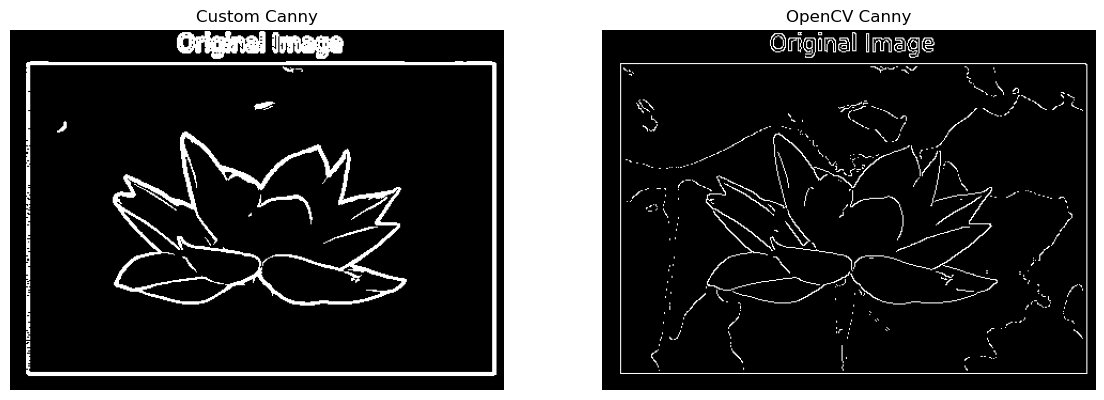

In [7]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt



def canny_edge_detection(image, low=50, high=150):
    """
    Canny Edge Detection - Shows only the final output
    
    Parameters:
    - image: Your input grayscale image (numpy array)
    - low: Low threshold (default: 50)
    - high: High threshold (default: 150)
    
    Returns:
    - edges: Binary edge image|
      (0 or 255)
    """
    
    # Step 1: Gaussian 
    blurred = n Step 2: Calculate gradients
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    canny_gx = convolution2d(image.astype(np.float32), sobel_x)
    canny_gy = convolution2d(image.astype(np.float32), sobel_y)
    combined_canny = np.sqrt(canny_gx**2 + canny_gy**2)
    
    # Calculate angles
    angle = np.arctan2(canny_gy, canny_gx)
    angle[angle < 0] += np.pi
    
    # Step 3: Non-maximum suppression
    nms_r = nms(combined_canny, angle)
    
    # Step 4: Hysteresis thresholding
    edges = hysteresis(nms_r, low, high)
    
    # Show only the final result
    plt.figure(figsize=(8, 6))
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection - Final Output')
    plt.axis('off')
    plt.show()
    
    print(f"✅ Edge pixels found: {np.sum(edges == 255)}")
    
    return edges

def nms(combined_canny, angle):
    """Non-maximum suppression using sin/cos, with edge direction (perpendicular to gradient)"""
    height, width = combined_canny.shape
    suppressed = np.zeros((height, width), dtype=np.float64)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            current_magnitude = combined_canny[i, j]
            current_angle = angle[i, j]
            
            # Use edge direction (perpendicular to gradient): add pi/2
            edge_angle = current_angle + np.pi / 2
            
            dx = np.cos(edge_angle)
            dy = np.sin(edge_angle)
            
            x1 = int(np.round(j + dx))
            y1 = int(np.round(i + dy))
            x2 = int(np.round(j - dx))
            y2 = int(np.round(i - dy))
            
            if (0 <= x1 < width and 0 <= y1 < height and 
                0 <= x2 < width and 0 <= y2 < height):
                
                neighbor1_mag = combined_canny[y1, x1]
                neighbor2_mag = combined_canny[y2, x2]
                
                if (current_magnitude >= neighbor1_mag and 
                    current_magnitude >= neighbor2_mag):
                    suppressed[i, j] = current_magnitude
                    
    return suppressed

def hysteresis(nms_r, low, high):
    """Hysteresis thresholding"""
    height, width = nms_r.shape
    
    strong_edges = (nms_r >= high)
    weak_edges = ((nms_r >= low) & (nms_r < high))
    
    edges = np.zeros((height, width), dtype=np.uint8)
    edges[strong_edges] = 255
    
    changed = True
    iterations = 0
    while changed and iterations < 20:
        changed = False
        iterations += 1
        
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if weak_edges[i, j] and edges[i, j] == 0:
                    neighborhood = edges[i-1:i+2, j-1:j+2]
                    if np.any(neighborhood == 255):
                        edges[i, j] = 255
                        changed = True
                        
    return edges

# Load your image
img = cv2.imread('phool.png', cv2.IMREAD_GRAYSCALE)

# Custom Canny
edges_custom = canny_edge_detection(img, low=100, high=120)

# OpenCV Canny
edges_cv = cv2.Canny(img, 100, 120)

# Show both results side by side
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(edges_custom, cmap='gray')
plt.title('Custom Canny')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edges_cv, cmap='gray')
plt.title('OpenCV Canny')
plt.axis('off')
plt.show()

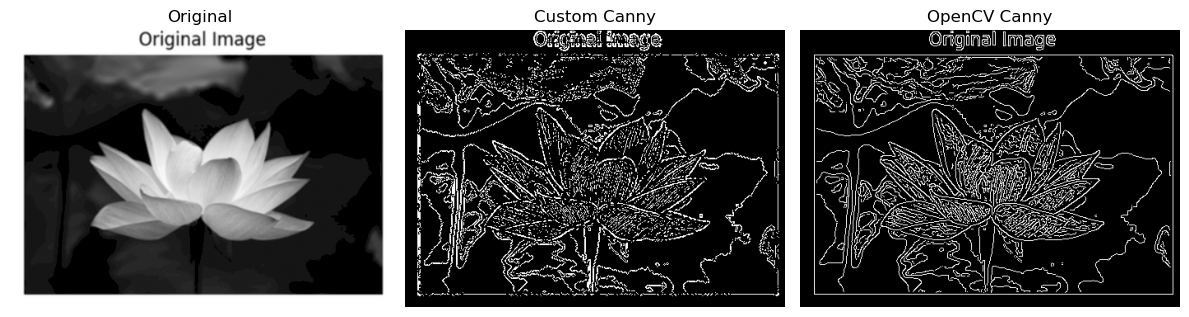

In [6]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

image = cv2.imread('phool.png', cv2.IMREAD_GRAYSCALE)



def canny_edge_detection(image, low=50, high=150):
    """
    Canny Edge Detection implementation
    """
    
    
    # Step 2: Calculate gradients
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
    
    gx = convolution2d(image.astype(np.float32), sobel_x)
    gy = convolution2d(image.astype(np.float32), sobel_y)

    # Calculate magnitude and angle
    magnitude = np.sqrt(gx**2 + gy**2)
    angle = np.arctan2(gy, gx)
    
    # Step 3: Non-maximum suppression
    nms_result = non_max_suppression(magnitude, angle)
    
    # Step 4: Hysteresis thresholding
    edges = hysteresis(nms_result, low, high)
    
    return edges

def non_max_suppression(magnitude, angle):
    """
    Non-maximum suppression along edge direction
    """
    height, width = magnitude.shape
    suppressed = np.zeros((height, width), dtype=np.float32)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            current_mag = magnitude[i, j]
            
            if current_mag == 0:
                continue
                
            current_angle = angle[i, j]
            
            # Edge direction is perpendicular to gradient
            edge_angle = current_angle + np.pi / 2
            
            # Calculate neighbor positions
            dx = np.cos(edge_angle)
            dy = np.sin(edge_angle)
            
            # Get interpolated magnitudes
            mag1 = bilinear_interpolate(magnitude, i + dy, j + dx)
            mag2 = bilinear_interpolate(magnitude, i - dy, j - dx)
            
            # Keep if local maximum
            if current_mag >= mag1 and current_mag >= mag2:
                suppressed[i, j] = current_mag
    
    return suppressed

def bilinear_interpolate(img, y, x):
    """
    Bilinear interpolation at non-integer coordinates
    """
    height, width = img.shape
    
    # Boundary check
    if y < 0 or y >= height - 1 or x < 0 or x >= width - 1:
        return 0
    
    # Get integer parts
    x1, y1 = int(np.floor(x)), int(np.floor(y))
    x2, y2 = min(x1 + 1, width - 1), min(y1 + 1, height - 1)
    
    # Get fractional parts
    fx = x - x1
    fy = y - y1
    
    # Bilinear interpolation
    return (img[y1, x1] * (1 - fx) * (1 - fy) +
            img[y1, x2] * fx * (1 - fy) +
            img[y2, x1] * (1 - fx) * fy +
            img[y2, x2] * fx * fy)

def hysteresis(nms_img, low, high):
    """
    Hysteresis thresholding
    """
    height, width = nms_img.shape
    
    # Initialize result
    edges = np.zeros((height, width), dtype=np.uint8)
    
    # Find strong and weak edges
    strong_mask = (nms_img >= high)
    weak_mask = ((nms_img >= low) & (nms_img < high))
    
    # Mark strong edges
    edges[strong_mask] = 255
    
    # Connect weak edges using iterative approach
    changed = True
    iteration = 0
    max_iter = 100
    
    while changed and iteration < max_iter:
        changed = False
        iteration += 1
        
        # Find weak pixels adjacent to strong pixels
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if weak_mask[i, j] and edges[i, j] == 0:
                    # Check 8-connected neighborhood
                    if np.any(edges[i-1:i+2, j-1:j+2] == 255):
                        edges[i, j] = 255
                        changed = True
    
    return edges

# Load your image
img = cv2.imread('phool.png', cv2.IMREAD_GRAYSCALE)

# Custom Canny
edges_custom = canny_edge_detection(img, low=10, high=20)

# OpenCV Canny
edges_cv = cv2.Canny(img, 10, 20)

# Show comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges_custom, cmap='gray')
plt.title('Custom Canny')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_cv, cmap='gray')
plt.title('OpenCV Canny')
plt.axis('off')

plt.tight_layout()
plt.show()